In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
train_path = '/kaggle/input/playground-series-s4e11/train.csv'
test_path = '/kaggle/input/playground-series-s4e11/test.csv'

In [101]:
X_train = pd.read_csv(train_path)
X_test = pd.read_csv(test_path)

In [102]:
X_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [104]:
X_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
# a highly imbalanced dataset
#print(y_train.value_counts())
#sns.countplot(y_train, x = 'Depression').set_xlabel('Depression')
#plt.ylabel("count")

In [105]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [76]:
print(X_train['Working Professional or Student'].value_counts(), '\n')

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64 



In [106]:
# all Student have missing values in columns 'Profession, 'Academic Pressure', 'CGPA', 
# 'Study Satisfaction'
students = X_train[X_train['Working Professional or Student'] == 'Student']
missing_values = students.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values by students in training data")
print(columns_with_missing, '\n')

students = X_test[X_test['Working Professional or Student'] == 'Student']
missing_values = students.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values by students in test data")
print(columns_with_missing)

Columns with missing values by students in training data
Profession            27867
Academic Pressure         9
Work Pressure         27898
CGPA                      9
Study Satisfaction       10
Job Satisfaction      27893
Dietary Habits            2
Financial Stress          3
dtype: int64 

Columns with missing values by students in test data
Profession            18746
Academic Pressure         7
Work Pressure         18768
CGPA                      9
Study Satisfaction        8
Job Satisfaction      18765
Dietary Habits            3
Degree                    1
dtype: int64


In [107]:
'''
Replace missing values of students in column 'Profession' with 'Student'
'''
mask = (X_train['Working Professional or Student'] == 'Student') & (X_train['Profession'].isnull())
X_train.loc[mask, 'Profession'] = 'Student'

mask = (X_test['Working Professional or Student'] == 'Student') & (X_test['Profession'].isnull())
X_test.loc[mask, 'Profession'] = 'Student'

In [108]:
'''
Replace missing values of students in column 'Work Pressure' with the values in
'Academic Pressure'
'''
mask = X_train['Work Pressure'].isnull() & X_train['Academic Pressure'].notnull()
X_train.loc[mask, 'Work Pressure'] = X_train.loc[mask, 'Academic Pressure']

mask = X_test['Work Pressure'].isnull() & X_test['Academic Pressure'].notnull()
X_test.loc[mask, 'Work Pressure'] = X_test.loc[mask, 'Academic Pressure']

In [109]:
'''
Replace missing values of students in column 'Job Satisfaction' with the values in
'Study Satisfaction'
'''
mask = X_train['Job Satisfaction'].isnull() & X_train['Study Satisfaction'].notnull()
X_train.loc[mask, 'Job Satisfaction'] = X_train.loc[mask, 'Study Satisfaction']

mask = X_test['Job Satisfaction'].isnull() & X_test['Study Satisfaction'].notnull()
X_test.loc[mask, 'Job Satisfaction'] = X_test.loc[mask, 'Study Satisfaction']

In [110]:
# Removing columns "Study Satisfaction" and "Academic Pressure"
X_train = X_train.drop(['Study Satisfaction', 'Academic Pressure'], axis=1)
X_test = X_test.drop(['Study Satisfaction', 'Academic Pressure'], axis=1)

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             131937 non-null  object 
 7   Work Pressure                          140679 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Job Satisfaction                       140685 non-null  float64
 10  Sleep Duration                         140700 non-null  

In [112]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             87914 non-null  object 
 7   Work Pressure                          93788 non-null  float64
 8   CGPA                                   18766 non-null  float64
 9   Job Satisfaction                       93792 non-null  float64
 10  Sleep Duration                         93800 non-null  object 
 11  Di

In [113]:
# replace missing values in 'Profession' with 'Unknown'
missing = X_train['Profession'].isnull().sum()
X_train['Profession'] = X_train['Profession'].fillna('Unknown')

missing = X_test['Profession'].isnull().sum()
X_test['Profession'] = X_test['Profession'].fillna('Unknown')

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Work Pressure                          140679 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Job Satisfaction                       140685 non-null  float64
 10  Sleep Duration                         140700 non-null  

In [115]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93800 non-null  object 
 7   Work Pressure                          93788 non-null  float64
 8   CGPA                                   18766 non-null  float64
 9   Job Satisfaction                       93792 non-null  float64
 10  Sleep Duration                         93800 non-null  object 
 11  Di

In [116]:
# Removing columns "CGPA"
X_train = X_train.drop(['CGPA'], axis=1)
X_test = X_test.drop(['CGPA'], axis=1)

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Work Pressure                          140679 non-null  float64
 8   Job Satisfaction                       140685 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [118]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93800 non-null  object 
 7   Work Pressure                          93788 non-null  float64
 8   Job Satisfaction                       93792 non-null  float64
 9   Sleep Duration                         93800 non-null  object 
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [21]:
# removing the rows with missing values
#drop_rows = ['Work Pressure', 'Job Satisfaction', 'Dietary Habits','Degree','Financial Stress']
#X_train = X_train.dropna(subset=drop_rows)
#X_test = X_test.dropna(subset=drop_rows)

In [119]:
X_train.describe()

,id,Age,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,140679.000000,140685.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.027410,2.968547,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.401947,1.405218,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [120]:
X_test.describe()

,id,Age,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,93788.000000,93792.000000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.041167,2.956617,6.247335,2.978763
std,27077.871962,12.393480,1.401429,1.403499,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,12.000000,5.000000


In [121]:
# replace missing values in 'Work Pressure' with mean value of 3.0
X_train['Work Pressure'] = X_train['Work Pressure'].fillna(3.0)
X_test['Work Pressure'] = X_test['Work Pressure'].fillna(3.0)

# replace missing values in 'Job Satisfaction' with mean value of 3.0
X_train['Job Satisfaction'] = X_train['Job Satisfaction'].fillna(3.0)
X_test['Job Satisfaction'] = X_test['Job Satisfaction'].fillna(3.0)

# replace missing values in 'Financial Stress' with mean value of 3.0
X_train['Financial Stress'] = X_train['Financial Stress'].fillna(3.0)

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [123]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93800 non-null  object 
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  object 
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [124]:
print(X_train['Gender'].unique(), '\n')
print(X_train['Working Professional or Student'].unique(), '\n')

print(X_test['Gender'].unique(), '\n')
print(X_test['Working Professional or Student'].unique(), '\n')


['Female' 'Male'] 

['Working Professional' 'Student'] 

['Male' 'Female'] 

['Working Professional' 'Student'] 



In [125]:
# Data preparatiion
X_train['Gender'].replace('Female', 0, inplace=True)
X_train['Gender'].replace('Male', 1, inplace=True)
X_train['Working Professional or Student'].replace('Working Professional', 0, inplace=True)
X_train['Working Professional or Student'].replace('Student', 1, inplace=True)

X_test['Gender'].replace('Female', 0, inplace=True)
X_test['Gender'].replace('Male', 1, inplace=True)
X_test['Working Professional or Student'].replace('Working Professional', 0, inplace=True)
X_test['Working Professional or Student'].replace('Student', 1, inplace=True)

/tmp/ipykernel_30/690714739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Gender'].replace('Female', 0, inplace=True)
/tmp/ipykernel_30/690714739.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  object 
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [127]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  object 
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  object 
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [97]:
'''
print(sorted(X_train['Age'].unique()), '\n')
print(sorted(X_test['Age'].unique()), '\n')

train_profs = set(X_train['Age'].unique())
test_profs = set(X_test['Age'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Age'] == i).sum())

# remove rows with difference values
X_test = X_test[~X_test['Age'].isin(difference)]
'''

[18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0] 

[18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 32.08, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0] 

{32.08}
1


In [28]:
'''
print(sorted(X_train['City'].unique()), '\n')
print(sorted(X_test['City'].unique()), '\n')

train_profs = set(X_train['City'].unique())
test_profs = set(X_test['City'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['City'] == i).sum())

# remove rows with difference values
X_test = X_test[~X_test['City'].isin(difference)]
'''

['3.0', 'Aaradhya', 'Aditya', 'Agra', 'Ahmedabad', 'Aishwarya', 'Anvi', 'Armaan', 'Atharv', 'Ayansh', 'Ayush', 'Bangalore', 'Bhavna', 'Bhopal', 'Chennai', 'Chhavi', 'City', 'Delhi', 'Dhruv', 'Faridabad', 'Galesabad', 'Gaurav', 'Ghaziabad', 'Gurgaon', 'Harsh', 'Harsha', 'Hyderabad', 'Indore', 'Ishanabad', 'Ishkarsh', 'Ithal', 'Itheg', 'Ivaan', 'Jaipur', 'Jhanvi', 'Kagan', 'Kalyan', 'Kanpur', 'Kashish', 'Kashk', 'Keshav', 'Khaziabad', 'Khushi', 'Kibara', 'Kolkata', 'Krinda', 'Krishna', 'Less Delhi', 'Less than 5 Kalyan', 'Lucknow', 'Ludhiana', 'M.Com', 'M.Tech', 'MCA', 'ME', 'MSc', 'Mahi', 'Malyansh', 'Meerut', 'Mihir', 'Mira', 'Molkata', 'Moreadhyay', 'Morena', 'Mumbai', 'Nagpur', 'Nalini', 'Nalyan', 'Nandini', 'Nashik', 'No', 'Parth', 'Patna', 'Plata', 'Pooja', 'Pratyush', 'Pune', 'Raghavendra', 'Rajkot', 'Rashi', 'Researcher', 'Reyansh', 'Saanvi', 'Shrey', 'Srinagar', 'Surat', 'Thane', 'Tolkata', 'Tushar', 'Unirar', 'Vaanya', 'Vadodara', 'Vaishnavi', 'Varanasi', 'Vasai-Virar', 'Vidhi'

In [29]:
'''
print(sorted(X_train['Profession'].unique()), '\n')
print(sorted(X_test['Profession'].unique()), '\n')

train_profs = set(X_train['Profession'].unique())
test_profs = set(X_test['Profession'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Profession'] == i).sum())

# remove rows with difference values
X_test = X_test[~X_test['Profession'].isin(difference)]
'''

['Academic', 'Accountant', 'Analyst', 'Architect', 'B.Com', 'B.Ed', 'BBA', 'BCA', 'BE', 'Business Analyst', 'Chef', 'Chemist', 'City Manager', 'Civil Engineer', 'Consultant', 'Content Writer', 'Customer Support', 'Data Scientist', 'Dev', 'Digital Marketer', 'Doctor', 'Educational Consultant', 'Electrician', 'Entrepreneur', 'Family Consultant', 'FamilyVirar', 'Finanancial Analyst', 'Financial Analyst', 'Graphic Designer', 'HR Manager', 'Investment Banker', 'Judge', 'LLM', 'Lawyer', 'M.Ed', 'MBA', 'MBBS', 'Manager', 'Marketing Manager', 'Mechanical Engineer', 'Medical Doctor', 'Moderate', 'Nagpur', 'Patna', 'PhD', 'Pharmacist', 'Pilot', 'Plumber', 'Pranav', 'Profession', 'Research Analyst', 'Researcher', 'Sales Executive', 'Software Engineer', 'Student', 'Teacher', 'Travel Consultant', 'UX/UI Designer', 'Unemployed', 'Unknown', 'Unveil', 'Visakhapatnam', 'Working Professional', 'Yogesh', 'Yuvraj'] 

['24th', '3M', 'Accountant', 'Analyst', 'Architect', 'B.Ed', 'B.Pharm', 'BBA', 'Business 

In [30]:
'''
print(sorted(X_train['Work Pressure'].unique()), '\n')
print(sorted(X_test['Work Pressure'].unique()), '\n')

train_profs = set(X_train['Work Pressure'].unique())
test_profs = set(X_test['Work Pressure'].unique())
difference = test_profs.difference(train_profs)
print(difference)
'''

[1.0, 2.0, 3.0, 4.0, 5.0] 

[1.0, 2.0, 3.0, 4.0, 5.0] 

set()


In [31]:
'''
print(sorted(X_train['Job Satisfaction'].unique()), '\n')
print(sorted(X_test['Job Satisfaction'].unique()), '\n')

train_profs = set(X_train['Job Satisfaction'].unique())
test_profs = set(X_test['Job Satisfaction'].unique())
difference = test_profs.difference(train_profs)
print(difference)
'''

[1.0, 2.0, 3.0, 4.0, 5.0] 

[1.0, 2.0, 3.0, 4.0, 5.0] 

set()


In [32]:
'''
print(sorted(X_train['Sleep Duration'].unique()), '\n')
print(sorted(X_test['Sleep Duration'].unique()), '\n')

train_profs = set(X_train['Sleep Duration'].unique())
test_profs = set(X_test['Sleep Duration'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Sleep Duration'] == i).sum())

# remove rows with difference values
X_test = X_test[~X_test['Profession'].isin(difference)]
'''

['1-2 hours', '1-3 hours', '1-6 hours', '10-11 hours', '10-6 hours', '2-3 hours', '3-4 hours', '3-6 hours', '35-36 hours', '4-5 hours', '4-6 hours', '40-45 hours', '45', '45-48 hours', '49 hours', '5-6 hours', '55-66 hours', '6-7 hours', '6-8 hours', '7-8 hours', '8 hours', '8-9 hours', '9-11 hours', '9-5', '9-5 hours', '9-6 hours', 'Indore', 'Less than 5 hours', 'Moderate', 'More than 8 hours', 'No', 'Pune', 'Sleep_Duration', 'Unhealthy', 'Work_Study_Hours', 'than 5 hours'] 

['0', '1-2 hours', '1-3 hours', '1-6 hours', '10-6 hours', '2-3 hours', '20-21 hours', '3-4 hours', '3-6 hours', '4-5 hours', '4-6 hours', '5-6 hours', '50-75 hours', '6 hours', '6-7 hours', '60-65 hours', '7-8 hours', '8-89 hours', '8-9 hours', '9-10 hours', '9-11 hours', '9-5', '9-5 hours', '9-6 hours', 'Have_you_ever_had_suicidal_thoughts', 'Less than 5 hours', 'Meerut', 'More than 8 hours', 'Unhealthy', 'Vivan', 'than 5 hours'] 

{'6 hours', '8-89 hours', 'Vivan', '20-21 hours', 'Meerut', '0', '60-65 hours', 

In [33]:
'''
print(sorted(X_train['Dietary Habits'].unique()), '\n')
print(sorted(X_test['Dietary Habits'].unique()), '\n')

train_profs = set(X_train['Dietary Habits'].unique())
test_profs = set(X_test['Dietary Habits'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Dietary Habits'] == i).sum())

# remove rows with difference values
X_test = X_test[~X_test['Dietary Habits'].isin(difference)]
'''

['1.0', '2', '3', 'BSc', 'Class 12', 'Electrician', 'Gender', 'Healthy', 'Hormonal', 'Indoor', 'Less Healthy', 'Less than Healthy', 'M.Tech', 'Male', 'Mihir', 'Moderate', 'More Healthy', 'No', 'No Healthy', 'Pratham', 'Unhealthy', 'Vegas', 'Yes'] 

['1.0', '5 Healthy', '5 Unhealthy', 'Academic', 'Educational', 'Healthy', 'Indoor', 'Kolkata', 'Less Healthy', 'MCA', 'Male', 'Mealy', 'Moderate', 'More Healthy', 'Naina', 'No', 'Prachi', 'Raghav', 'Resistant', 'Soham', 'Unhealthy', 'Vivaan'] 

{'5 Healthy', 'Academic', 'Naina', 'Soham', 'Raghav', 'Vivaan', '5 Unhealthy', 'Kolkata', 'Mealy', 'MCA', 'Educational', 'Prachi', 'Resistant'}
1
1
1
1
1
1
1
1
1
1
1
1
1


In [34]:
'''
print(sorted(X_train['Degree'].unique()), '\n')
print(sorted(X_test['Degree'].unique()), '\n')

train_profs = set(X_train['Degree'].unique())
test_profs = set(X_test['Degree'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Degree'] == i).sum())

# remove rows with difference values
X_test = X_test[~X_test['Degree'].isin(difference)]
'''

['0', '20', '24', '29', '5.56', '5.61', '5.88', '7.06', '8.56', 'ACA', 'Aarav', 'Advait', 'B', 'B B.Com', 'B BA', 'B.03', 'B.3.79', 'B.Arch', 'B.B.Arch', 'B.Com', 'B.Ed', 'B.Pharm', 'B.Sc', 'B.Student', 'B.Tech', 'BA', 'BArch', 'BB', 'BBA', 'BCA', 'BE', 'BEd', 'BH', 'BHM', 'BPA', 'BPharm', 'BSc', 'Badhya', 'Bhavesh', 'Bhopal', 'Brit', 'Brithika', 'Business Analyst', 'CGPA', 'Class 11', 'Class 12', 'Data Scientist', 'Degree', 'Doctor', 'E.Tech', 'Entrepreneur', 'Esha', 'HCA', 'HR Manager', 'H_Pharm', 'Jhanvi', 'K.Ed', 'Kalyan', 'L.Ed', 'LCA', 'LHM', 'LL B.Ed', 'LL.Com', 'LLB', 'LLBA', 'LLCom', 'LLEd', 'LLM', 'LLS', 'LLTech', 'Lata', 'M', 'M. Business Analyst', 'M.Arch', 'M.Com', 'M.Ed', 'M.Pharm', 'M.S', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA', 'MD', 'ME', 'MEd', 'MHM', 'MPA', 'MPharm', 'MSc', 'MTech', 'M_Tech', 'Mahika', 'Marsh', 'Mihir', 'Mthanya', 'N.Pharm', 'Nalini', 'Navya', 'P.Com', 'P.Pharm', 'PhD', 'Pihu', 'Plumber', 'RCA', 'Ritik', 'S.Arch', 'S.Pharm', 'S.Tech', 'UX/UI Designer', 

In [35]:
'''
print(sorted(X_train['Have you ever had suicidal thoughts ?'].unique()), '\n')
print(sorted(X_test['Have you ever had suicidal thoughts ?'].unique()), '\n')

train_profs = set(X_train['Have you ever had suicidal thoughts ?'].unique())
test_profs = set(X_test['Have you ever had suicidal thoughts ?'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Have you ever had suicidal thoughts ?'] == i).sum())
'''

# remove rows with difference values
#X_test = X_test[~X_test['Have you ever had suicidal thoughts ?'].isin(difference)]

['No', 'Yes'] 

['No', 'Yes'] 

set()


In [36]:
'''
print(sorted(X_train['Work/Study Hours'].unique()), '\n')
print(sorted(X_test['Work/Study Hours'].unique()), '\n')

train_profs = set(X_train['Work/Study Hours'].unique())
test_profs = set(X_test['Work/Study Hours'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Work/Study Hours'] == i).sum())
'''
# remove rows with difference values
#X_test = X_test[~X_test['Work/Study Hours'].isin(difference)]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0] 

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0] 

set()


In [37]:
'''
print(sorted(X_train['Financial Stress'].unique()), '\n')
print(sorted(X_test['Financial Stress'].unique()), '\n')

train_profs = set(X_train['Financial Stress'].unique())
test_profs = set(X_test['Financial Stress'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Financial Stress'] == i).sum())
'''
# remove rows with difference values
#X_test = X_test[~X_test['Financial Stress'].isin(difference)]

[1.0, 2.0, 3.0, 4.0, 5.0] 

[1.0, 2.0, 3.0, 4.0, 5.0] 

set()


In [38]:
'''
print(sorted(X_train['Family History of Mental Illness'].unique()), '\n')
print(sorted(X_test['Family History of Mental Illness'].unique()), '\n')

train_profs = set(X_train['Family History of Mental Illness'].unique())
test_profs = set(X_test['Family History of Mental Illness'].unique())
difference = test_profs.difference(train_profs)
print(difference)

for i in difference:
    print((X_test['Family History of Mental Illness'] == i).sum())
'''
# remove rows with difference values
#X_test = X_test[~X_test['Family History of Mental Illness'].isin(difference)]

['No', 'Yes'] 

['No', 'Yes'] 

set()


In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  object 
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [129]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  object 
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  object 
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [130]:
prof_array = set(X_train['Profession'].unique())
profession_mapping = {}
count = 0
for i in prof_array:
    profession_mapping[i] = count
    count = count + 1

In [131]:
profession_mapping

{'UX/UI Designer': 0,
 'BE': 1,
 'MBA': 2,
 'Chemist': 3,
 'Academic': 4,
 'HR Manager': 5,
 'Business Analyst': 6,
 'B.Com': 7,
 'M.Ed': 8,
 'Student': 9,
 'Judge': 10,
 'Nagpur': 11,
 'City Manager': 12,
 'Architect': 13,
 'Consultant': 14,
 'Visakhapatnam': 15,
 'Pilot': 16,
 'Electrician': 17,
 'Yogesh': 18,
 'Profession': 19,
 'Researcher': 20,
 'Civil Engineer': 21,
 'Doctor': 22,
 'Analyst': 23,
 'PhD': 24,
 'Yuvraj': 25,
 'Moderate': 26,
 'Plumber': 27,
 'Sales Executive': 28,
 'LLM': 29,
 'Entrepreneur': 30,
 'Unemployed': 31,
 'Educational Consultant': 32,
 'Teacher': 33,
 'Data Scientist': 34,
 'Medical Doctor': 35,
 'Chef': 36,
 'Working Professional': 37,
 'Graphic Designer': 38,
 'Financial Analyst': 39,
 'Travel Consultant': 40,
 'Research Analyst': 41,
 'Finanancial Analyst': 42,
 'Lawyer': 43,
 'Unknown': 44,
 'Customer Support': 45,
 'Accountant': 46,
 'Digital Marketer': 47,
 'B.Ed': 48,
 'Pranav': 49,
 'Software Engineer': 50,
 'Dev': 51,
 'Content Writer': 52,
 'Ph

In [132]:
X_train['Profession'] = X_train['Profession'].map(profession_mapping)
X_test['Profession'] = X_test['Profession'].map(profession_mapping)

In [133]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  int64  
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [134]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93780 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  object 
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [135]:
X_test.describe()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,93800.000000,93800.000000,93780.000000,93800.000000,93800.000000,93800.000000,93800.000000
mean,187599.500000,0.546503,40.321685,0.200128,27.634911,3.041162,2.956620,6.247335,2.978763
std,27077.871962,0.497835,12.393480,0.400098,16.851221,1.401340,1.403439,3.858191,1.414604
min,140700.000000,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,164149.750000,0.000000,29.000000,0.000000,9.000000,2.000000,2.000000,3.000000,2.000000
50%,187599.500000,1.000000,42.000000,0.000000,33.000000,3.000000,3.000000,6.000000,3.000000
75%,211049.250000,1.000000,51.000000,0.000000,42.000000,4.000000,4.000000,10.000000,4.000000
max,234499.000000,1.000000,60.000000,1.000000,64.000000,5.000000,5.000000,12.000000,5.000000


In [136]:
# replace missing values in 'Profession' with mean value 28
X_test['Profession'] = X_test['Profession'].fillna(28.0)

In [137]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  object 
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [138]:
sleep_array = set(X_train['Sleep Duration'].unique())
sleep_mapping = {}
count = 0
for i in sleep_array:
    sleep_mapping[i] = count
    count = count + 1

In [139]:
sleep_mapping

{'9-5 hours': 0,
 '35-36 hours': 1,
 '6-8 hours': 2,
 '9-6 hours': 3,
 'than 5 hours': 4,
 'Work_Study_Hours': 5,
 '4-5 hours': 6,
 '5-6 hours': 7,
 '8-9 hours': 8,
 '3-4 hours': 9,
 '4-6 hours': 10,
 'No': 11,
 '45': 12,
 'Less than 5 hours': 13,
 'Moderate': 14,
 'Sleep_Duration': 15,
 '9-5': 16,
 '10-11 hours': 17,
 'Indore': 18,
 '49 hours': 19,
 '3-6 hours': 20,
 '8 hours': 21,
 'Unhealthy': 22,
 'Pune': 23,
 '10-6 hours': 24,
 '1-6 hours': 25,
 '55-66 hours': 26,
 '9-11 hours': 27,
 '7-8 hours': 28,
 '40-45 hours': 29,
 '1-3 hours': 30,
 '2-3 hours': 31,
 '45-48 hours': 32,
 'More than 8 hours': 33,
 '1-2 hours': 34,
 '6-7 hours': 35}

In [140]:
X_train['Sleep Duration'] = X_train['Sleep Duration'].map(sleep_mapping)
X_test['Sleep Duration'] = X_test['Sleep Duration'].map(sleep_mapping)

In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  int64  
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  int64  
 10  Dietary Habits                         140696 non-null  

In [142]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93789 non-null  float64
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [143]:
X_test.describe()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93789.000000,93800.000000,93800.000000
mean,187599.500000,0.546503,40.321685,0.200128,27.634989,3.041162,2.956620,20.281899,6.247335,2.978763
std,27077.871962,0.497835,12.393480,0.400098,16.849426,1.401340,1.403439,10.424211,3.858191,1.414604
min,140700.000000,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,164149.750000,0.000000,29.000000,0.000000,9.000000,2.000000,2.000000,13.000000,3.000000,2.000000
50%,187599.500000,1.000000,42.000000,0.000000,33.000000,3.000000,3.000000,13.000000,6.000000,3.000000
75%,211049.250000,1.000000,51.000000,0.000000,42.000000,4.000000,4.000000,28.000000,10.000000,4.000000
max,234499.000000,1.000000,60.000000,1.000000,64.000000,5.000000,5.000000,35.000000,12.000000,5.000000


In [144]:
# replace missing values in 'Sleep Duration' with mean value 20.0
X_test['Sleep Duration'] = X_test['Sleep Duration'].fillna(20.0)

In [145]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  float64
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [146]:
city_array = set(X_train['City'].unique())
city_mapping = {}
count = 0
for i in city_array:
    city_mapping[i] = count
    count = count + 1

In [149]:
city_mapping

{'Tushar': 0,
 'Mira': 1,
 'ME': 2,
 'Vaanya': 3,
 'Ishkarsh': 4,
 'Bhavna': 5,
 'Vasai-Virar': 6,
 'Khaziabad': 7,
 'Aaradhya': 8,
 'Mahi': 9,
 'Indore': 10,
 'Unirar': 11,
 'Delhi': 12,
 'Srinagar': 13,
 'Surat': 14,
 'Atharv': 15,
 'Dhruv': 16,
 'Less Delhi': 17,
 'Tolkata': 18,
 'MSc': 19,
 'Mumbai': 20,
 'M.Tech': 21,
 'Vidhi': 22,
 'Kashk': 23,
 'Mihir': 24,
 'Molkata': 25,
 'Raghavendra': 26,
 'Chennai': 27,
 'Nandini': 28,
 'M.Com': 29,
 'Visakhapatnam': 30,
 'Harsha': 31,
 'Vidya': 32,
 'Ayush': 33,
 'Armaan': 34,
 'Galesabad': 35,
 'Chhavi': 36,
 'Pune': 37,
 'Hyderabad': 38,
 'Kolkata': 39,
 'Parth': 40,
 'MCA': 41,
 'Kibara': 42,
 'Less than 5 Kalyan': 43,
 'Keshav': 44,
 'Harsh': 45,
 'Rashi': 46,
 'Ishanabad': 47,
 'Patna': 48,
 'Morena': 49,
 'Rajkot': 50,
 'Bhopal': 51,
 'Pooja': 52,
 'Krishna': 53,
 'Gurgaon': 54,
 'Nagpur': 55,
 'City': 56,
 'Thane': 57,
 'Nalyan': 58,
 'Faridabad': 59,
 'Researcher': 60,
 'Bangalore': 61,
 'Krinda': 62,
 'Jhanvi': 63,
 'Nalini': 64,


In [150]:
X_train['City'] = X_train['City'].map(city_mapping)
X_test['City'] = X_test['City'].map(city_mapping)

In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  int64  
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  int64  
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  int64  
 10  Dietary Habits                         140696 non-null  

In [152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93770 non-null  float64
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  float64
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [153]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93770 non-null  float64
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  float64
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [154]:
X_test.describe()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,93800.000000,93770.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000
mean,187599.500000,0.546503,40.321685,51.781391,0.200128,27.634989,3.041162,2.956620,20.281866,6.247335,2.978763
std,27077.871962,0.497835,12.393480,26.442785,0.400098,16.849426,1.401340,1.403439,10.423600,3.858191,1.414604
min,140700.000000,0.000000,18.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,164149.750000,0.000000,29.000000,30.000000,0.000000,9.000000,2.000000,2.000000,13.000000,3.000000,2.000000
50%,187599.500000,1.000000,42.000000,55.000000,0.000000,33.000000,3.000000,3.000000,13.000000,6.000000,3.000000
75%,211049.250000,1.000000,51.000000,74.000000,0.000000,42.000000,4.000000,4.000000,28.000000,10.000000,4.000000
max,234499.000000,1.000000,60.000000,92.000000,1.000000,64.000000,5.000000,5.000000,35.000000,12.000000,5.000000


In [155]:
# replace missing values in 'City' with mean value of 52.0
X_test['City'] = X_test['City'].fillna(52.0)

In [156]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  float64
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  float64
 10  Dietary Habits                         93795 non-null  object 
 11  De

In [157]:
object_to_int =set(['Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'])
#object_to_int

for i in object_to_int:
    help_array = set(X_train[i].unique())
    mapping = {}
    count = 0
    for j in help_array:
        mapping[j] = count
        count = count + 1
    X_train[i] = X_train[i].map(mapping)
    X_test[i] = X_test[i].map(mapping)

In [162]:
mapping

{'BH': 0,
 'MBA': 1,
 'UX/UI Designer': 2,
 'Aarav': 3,
 'CGPA': 4,
 '5.88': 5,
 'L.Ed': 6,
 'ME': 7,
 'Lata': 8,
 'HCA': 9,
 'P.Pharm': 10,
 'B.03': 11,
 nan: 12,
 'Vrinda': 13,
 'PhD': 14,
 'Vivaan': 15,
 'Ritik': 16,
 'Esha': 17,
 'Advait': 18,
 'LLM': 19,
 'MPharm': 20,
 'LLTech': 21,
 'M_Tech': 22,
 'H_Pharm': 23,
 'LLB': 24,
 'MSc': 25,
 'B.B.Arch': 26,
 'M.Tech': 27,
 'BCA': 28,
 'LLBA': 29,
 'Mihir': 30,
 'K.Ed': 31,
 'BE': 32,
 'Pihu': 33,
 'MPA': 34,
 'B.Com': 35,
 'M.Ed': 36,
 'S.Pharm': 37,
 '20': 38,
 '0': 39,
 'M.Com': 40,
 'BEd': 41,
 'Mahika': 42,
 'MTech': 43,
 'LL B.Ed': 44,
 'Mthanya': 45,
 'Unite': 46,
 'ACA': 47,
 'B.Tech': 48,
 'Bhavesh': 49,
 'MA': 50,
 '24': 51,
 'RCA': 52,
 'B BA': 53,
 'Brithika': 54,
 'BPA': 55,
 'E.Tech': 56,
 'Data Scientist': 57,
 'MCA': 58,
 'B.Ed': 59,
 'S.Arch': 60,
 'Bhopal': 61,
 'LCA': 62,
 'M.S': 63,
 'MHM': 64,
 'Navya': 65,
 'B.Pharm': 66,
 'Business Analyst': 67,
 'B': 68,
 'M.Pharm': 69,
 'LHM': 70,
 '7.06': 71,
 'Doctor': 72,
 

In [158]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  int64  
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  int64  
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  int64  
 10  Dietary Habits                         140700 non-null  

In [159]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  float64
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  float64
 10  Dietary Habits                         93787 non-null  float64
 11  De

In [161]:
X_test.describe()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
count,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93800.000000,93787.000000,93752.000000,93800.000000,93800.000000,93800.000000,93800.000000
mean,187599.500000,0.546503,40.321685,51.781461,0.200128,27.634989,3.041162,2.956620,20.281866,11.803757,58.795119,0.494936,6.247335,2.978763,0.497676
std,27077.871962,0.497835,12.393480,26.438556,0.400098,16.849426,1.401340,1.403439,10.423600,4.914433,32.070973,0.499977,3.858191,1.414604,0.499997
min,140700.000000,0.000000,18.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,164149.750000,0.000000,29.000000,30.000000,0.000000,9.000000,2.000000,2.000000,13.000000,6.000000,32.000000,0.000000,3.000000,2.000000,0.000000
50%,187599.500000,1.000000,42.000000,55.000000,0.000000,33.000000,3.000000,3.000000,13.000000,12.000000,59.000000,0.000000,6.000000,3.000000,0.000000
75%,211049.250000,1.000000,51.000000,74.000000,0.000000,42.000000,4.000000,4.000000,28.000000,18.000000,87.000000,1.000000,10.000000,4.000000,1.000000
max,234499.000000,1.000000,60.000000,92.000000,1.000000,64.000000,5.000000,5.000000,35.000000,23.000000,110.000000,1.000000,12.000000,5.000000,1.000000


In [165]:
# replace missing values in 'Dietary Habits' with mean value of 12.0
X_test['Dietary Habits'] = X_test['Dietary Habits'].fillna(12.0)

# replace missing values in 'Degree' with mean value of 59.0
X_test['Degree'] = X_test['Degree'].fillna(59.0)

In [166]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  int64  
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  float64
 5   Working Professional or Student        93800 non-null  int64  
 6   Profession                             93800 non-null  float64
 7   Work Pressure                          93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  float64
 10  Dietary Habits                         93800 non-null  float64
 11  De

In [167]:
y_train = X_train[['Depression']]

In [168]:
# remove Depression column
del X_train['Depression']

In [169]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  int64  
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  int64  
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  int64  
 10  Dietary Habits                         140700 non-null  

In [170]:
y_train.head()

,Depression
0,0
1,1
2,1
3,1
4,0


In [171]:
print(X_test.isnull().sum())

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64


In [60]:
#X_test = X_test.dropna()

In [172]:
# remove columns 'id', 'Name'
X_train.drop(['id', 'Name'], axis=1, inplace=True)
X_test_pre = X_test.copy()
X_test_pre.drop(['id', 'Name'], axis=1, inplace=True)

Text(0.5, 1.0, 'correlation matrix')

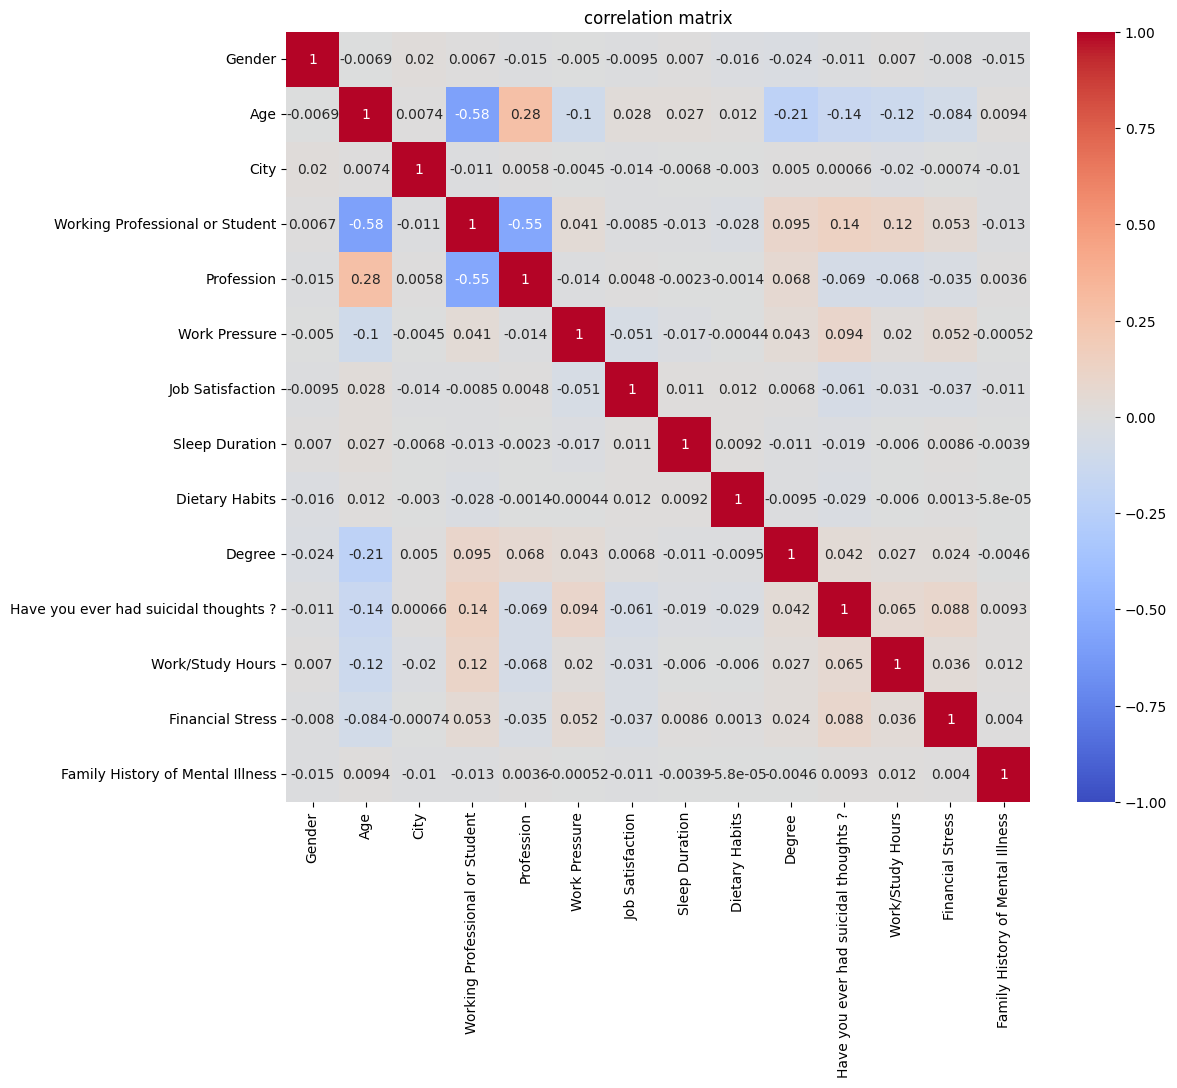

In [173]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('correlation matrix')

In [174]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [175]:
scaler = StandardScaler()

In [176]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [177]:
X_test_pre[X_test_pre.columns] = scaler.fit_transform(X_test_pre[X_test_pre.columns])

In [178]:
SVM = SVC()
SVM.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [179]:
pred = SVM.predict(X_test_pre)

In [180]:
output = pd.DataFrame({'id': X_test['id'],
                      'Depression': pred})

output.to_csv('submission.csv', index=False)

output.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
